In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/"

In [2]:

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
import seaborn as sn
from scipy.stats import skew
from scipy.stats import kurtosis
import math
import time

In [4]:
os.chdir("/content/drive/MyDrive/DATA/SS-AI")
!ls

data.csv


In [6]:
data=pd.read_csv("data.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   S.No                               327 non-null    int64 
 1   EmpID                              327 non-null    object
 2   Emp Name                           327 non-null    object
 3   DOJ                                327 non-null    object
 4   Designation                        327 non-null    object
 5   Grade                              327 non-null    object
 6   Attrition                          327 non-null    object
 7   Location                           325 non-null    object
 8   In Active Date                     327 non-null    object
 9   Tenure                             327 non-null    object
 10  Gender                             327 non-null    object
 11  Education                          327 non-null    object
 12  Age     

In [8]:
data.describe()

,S.No,Age,Last Rating,Monthly Income
count,327.000000,327.000000,327.000000,327.000000
mean,164.000000,28.541284,3.229358,32592.948012
std,94.540996,5.048596,1.038814,15995.368859
min,1.000000,24.000000,1.000000,25010.000000
25%,82.500000,25.000000,2.000000,25704.500000
50%,164.000000,27.000000,3.000000,26389.000000
75%,245.500000,28.500000,4.000000,31916.000000
max,327.000000,54.000000,5.000000,233954.000000


In [9]:
data.tail(15)

,S.No,EmpID,Emp Name,DOJ,Designation,Grade,Attrition,Location,In Active Date,Tenure,Gender,Education,Age,Last Rating,Monthly Income,Engagement Score (% Satisfaction),Marital Status,Zone,Remarks
312,313,XYZ3201,ABC313,21-Aug-12,Sales Executive,E1,Yes,Badlapur,6 Mar 13,0. 6,Male,Bachelors,24,3,25252,32%,Married,West,Absconding
313,314,XYZ3104,ABC314,16-Apr-12,Sales Executive,E1,Yes,Badlapur,6 Mar 13,0. 10,Male,Bachelors,27,5,25981,10%,Divorced,West,Absconding
314,315,XYZ3393,ABC315,2-Mar-13,Sales Executive,E1,Yes,Anand (Vadodara Ext),2 Mar 13,0. 0,Male,Bachelors,26,3,25948,73%,Single,West,Termination - Poor Performance
315,316,XYZ3111,ABC316,23-Apr-12,AM - Sales,M1,Yes,Navapur (Vyara Ext),15 Mar 13,0. 10,Male,Bachelors,39,2,53851,47%,Single,West,Lack of Growth
316,317,XYZ2003,ABC317,18-Dec-08,Sr Sales Executive,E2,Yes,Rajkot,15 Mar 13,4 .2,Male,Bachelors,35,3,33922,31%,Single,West,Health Reasons
317,318,XYZ1306,ABC318,5-Jan-08,AM - Sales,M1,Yes,Kotra,31 Mar 13,5 .2,Male,Bachelors,33,2,54517,94%,Divorced,Central,Lack of Growth
318,319,XYZ1912,ABC319,25-Nov-08,Sr Sales Executive,E2,Yes,Amritsar,22 Mar 13,4 .3,Male,Bachelors,30,3,34250,36%,Married,North,Lack of Growth
319,320,XYZ3059,ABC320,27-Feb-12,Sales Executive,E1,Yes,Vijay Vihar,11 Mar 13,1. 0,Male,Bachelors,25,5,26784,71%,Married,North,Issues with the Manager
320,321,XYZ3106,ABC321,6-Apr-12,Sales Executive,E1,Yes,Bachrawan,16 Mar 13,0. 11,Male,Bachelors,25,4,26671,51%,Married,North,Issues with the Manager
321,322,XYZ3159,ABC322,18-Jun-12,Sales Executive,E1,Yes,Jagdishpuram,2 Mar 13,0. 8,Male,Bachelors,28,4,25775,13%,Married,North,Lack of Growth


In [10]:
data.mean()

<ipython-input-10-abc01cf6c622>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



S.No                164.000000
Age                  28.541284
Last Rating           3.229358
Monthly Income    32592.948012
dtype: float64

In [38]:
data.Zone

0         West
1        South
2      CENTRAL
3         West
4        North
        ...   
322      South
323      South
324      South
325      South
326       East
Name: Zone, Length: 327, dtype: object

In [11]:
data.shape

(327, 19)

<ipython-input-12-0310499b92e5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



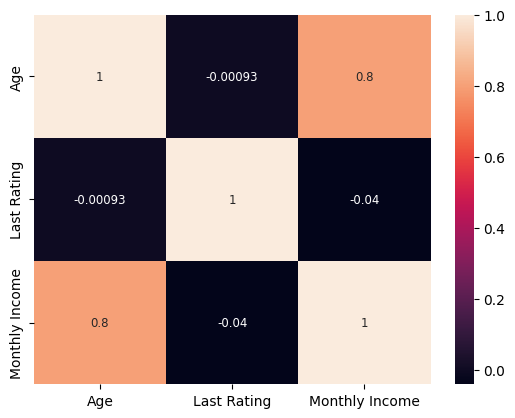

<Figure size 5000x5000 with 0 Axes>

In [12]:
dfss=data.drop(['S.No'], axis=1)
sn.heatmap(dfss.corr(method='pearson'),annot=True,annot_kws={'size': 8.5})
plt.figure(figsize=(50,50))
plt.show()

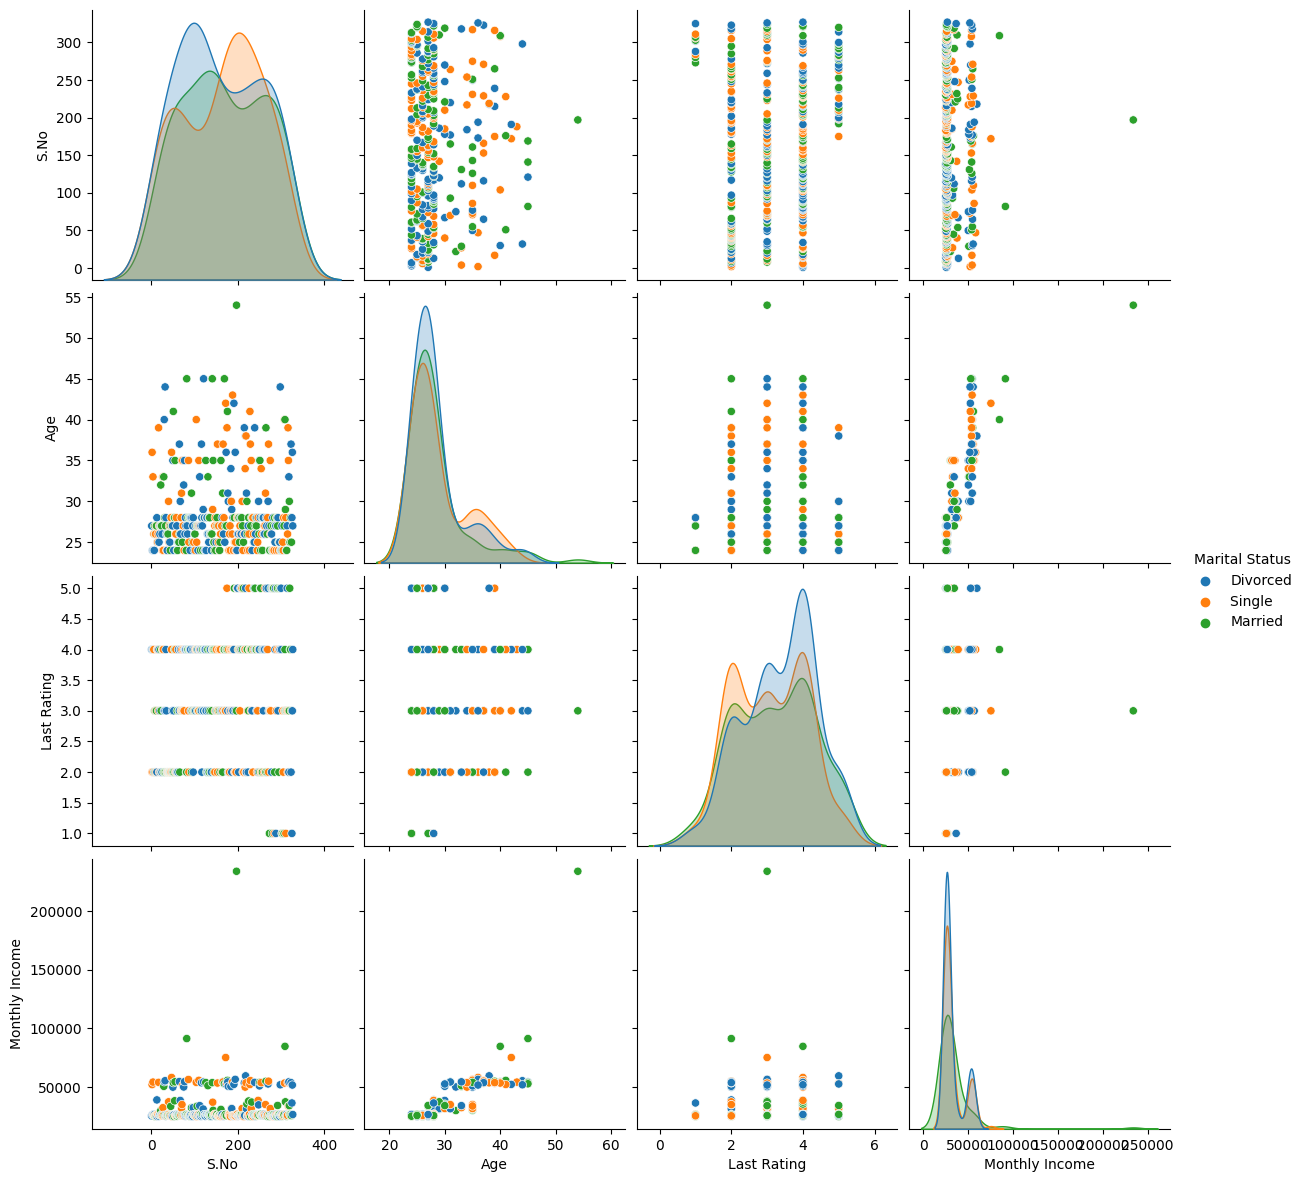

In [13]:
sn.pairplot(data,hue='Marital Status',height=3)

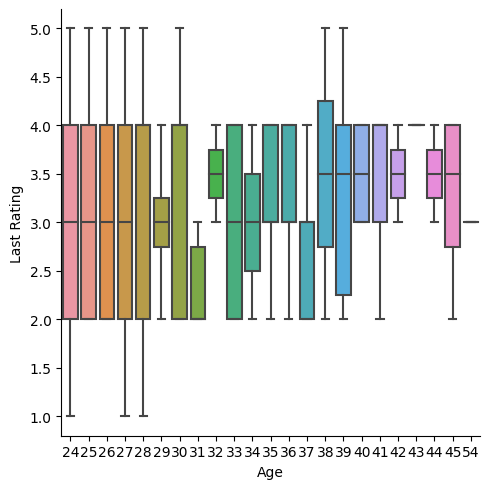

In [15]:
sn.catplot(data=data, x="Age", y="Last Rating", kind="box")

count       327.000000
mean      32592.948012
std       15995.368859
min       25010.000000
25%       25704.500000
50%       26389.000000
75%       31916.000000
max      233954.000000
Name: Monthly Income, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7b57b45e2080>,
 'caps': [<matplotlib.lines.Line2D at 0x7b57b45e25c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b57b45e1de0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b57b45e2b00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b57b47cd1b0>],
 'means': []}

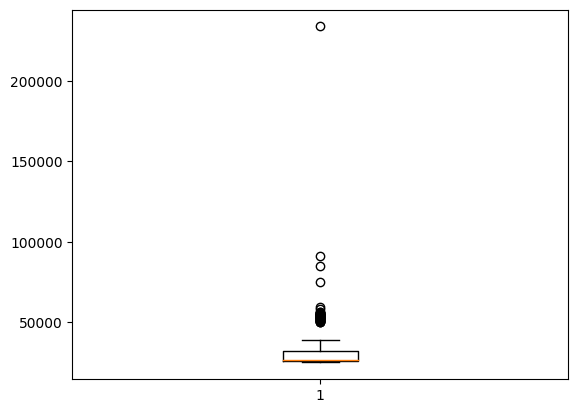

In [17]:
print(data["Monthly Income"].describe().T)
plt.boxplot(data["Monthly Income"])

(array([62., 38., 29., 41., 30., 57., 25., 15., 20., 10.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

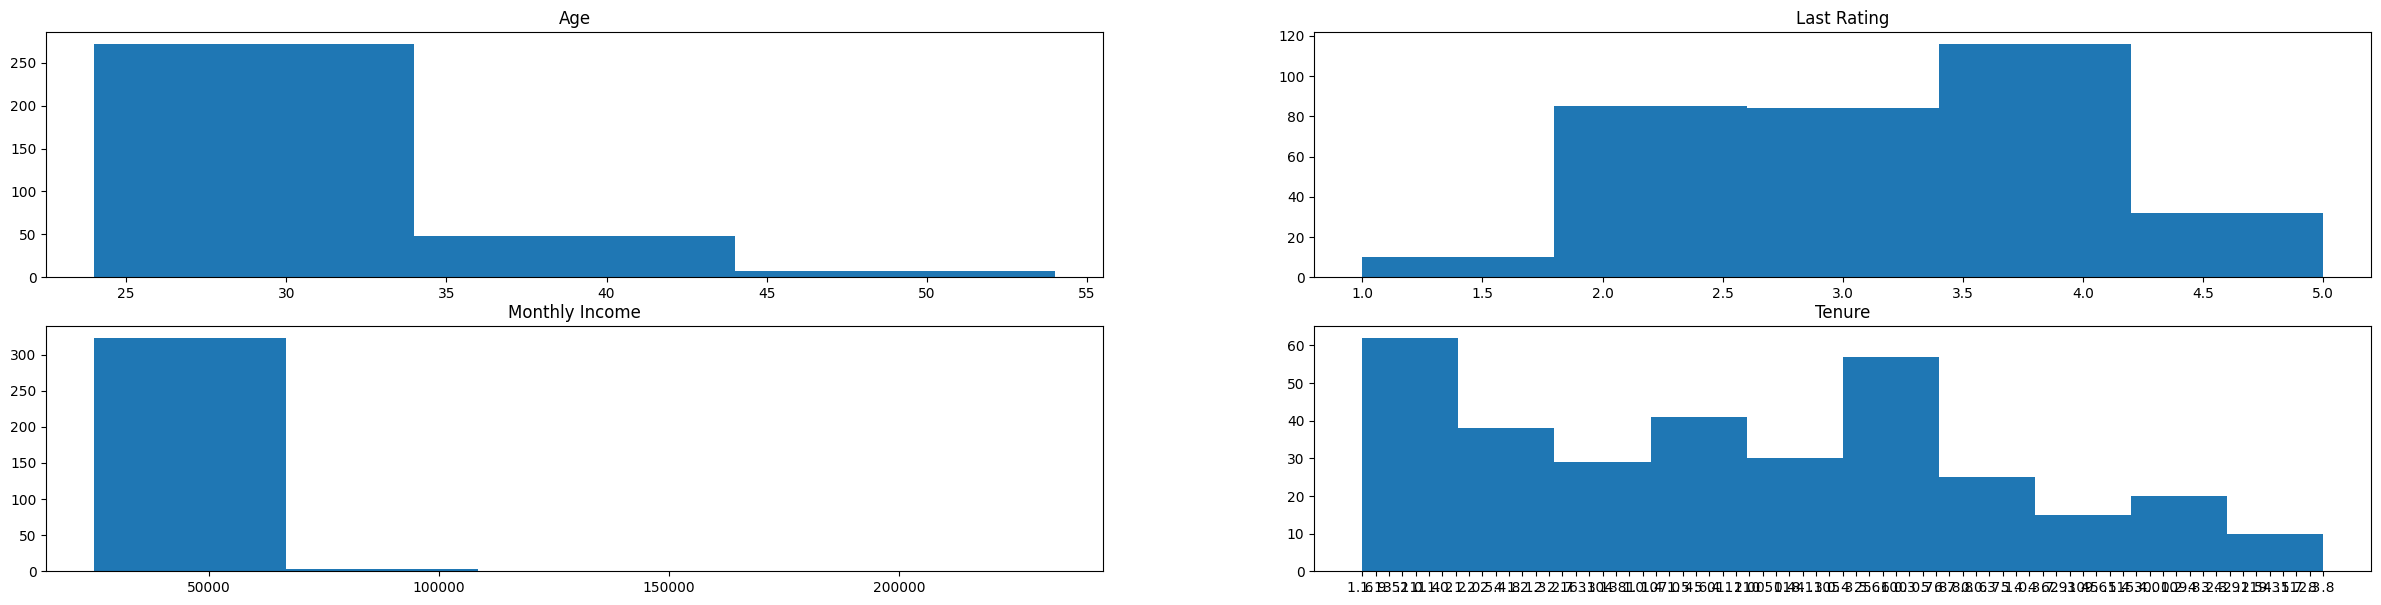

In [27]:
fig,axes=plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(30)
axes[0,0].set_title("Age")
axes[0,0].hist(data["Age"],bins=3)
axes[0,1].set_title("Last Rating")
axes[0,1].hist(data["Last Rating"],bins=5)
axes[1,0].set_title("Monthly Income")
axes[1,0].hist(data["Monthly Income"],bins=5)
axes[1,1].set_title("Tenure")
axes[1,1].hist(data["Tenure"],bins=10)

<Axes: xlabel='Monthly Income'>

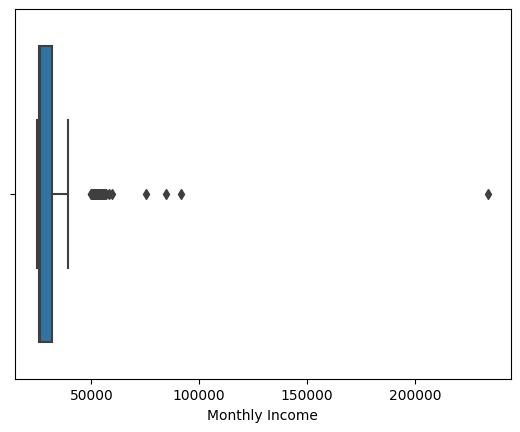

In [28]:
sn.boxplot(x='Monthly Income',data=data)

Text(0, 0.5, 'Monthly Income')

<Figure size 1000x600 with 0 Axes>

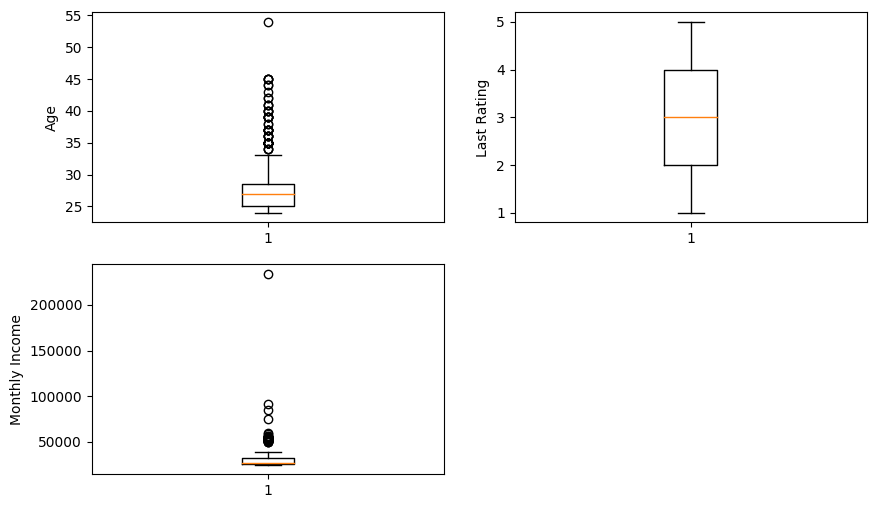

In [30]:
plt.figure(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.boxplot(data["Age"])
plt.ylabel("Age")
plt.subplot(2,2,2)
plt.boxplot(data["Last Rating"])
plt.ylabel("Last Rating")
plt.subplot(2,2,3)
plt.boxplot(data["Monthly Income"])
plt.ylabel("Monthly Income")

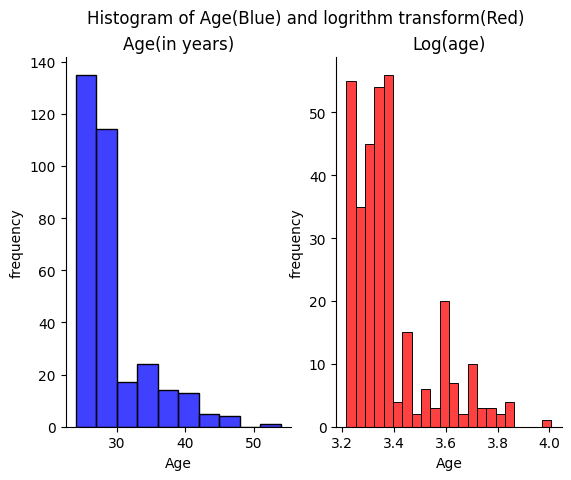

In [33]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Histogram of Age(Blue) and logrithm transform(Red)')
sn.despine()
sn.histplot(data.Age, bins = 10, color ='b',ax = axes[0])
axes[0].set_title('Age(in years)')
axes[0].set_ylabel('frequency')
sn.histplot(np.log(data.Age +1), color = 'r', ax = axes[1])
axes[1].set_title('Log(age)')
axes[1].set_ylabel('frequency')
plt.show()

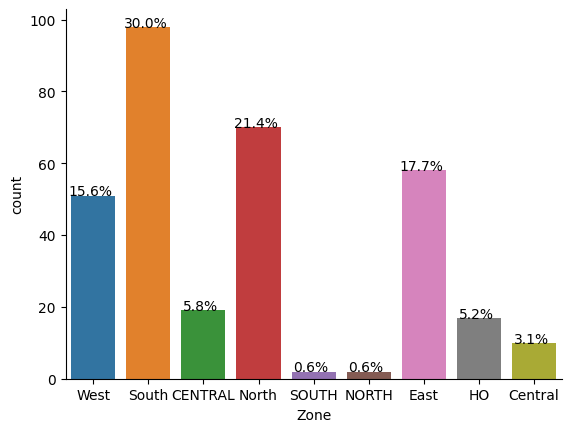

In [40]:
ax = sn.countplot(x =data.Zone)

sn.despine()
total = float(len(data.Zone))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2-0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

In [47]:
data.Remarks

0                             Issues with the Manager
1      More Challenging Job Roles/ Higher designation
2                             Issues with the Manager
3                                      Lack of Growth
4                             Issues with the Manager
                            ...                      
322                                    Lack of Growth
323                                    Lack of Growth
324                                    Lack of Growth
325                    Termination - Poor Performance
326                           Issues with the Manager
Name: Remarks, Length: 327, dtype: object

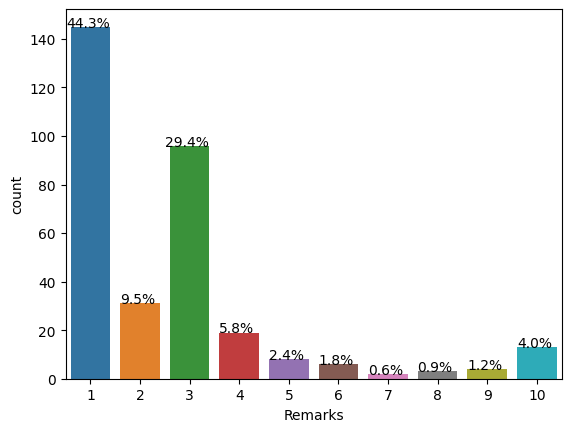

In [53]:
ax = sn.countplot(x =data.Remarks)
ax.set_xticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
total = float(len(data.Remarks))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2-0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

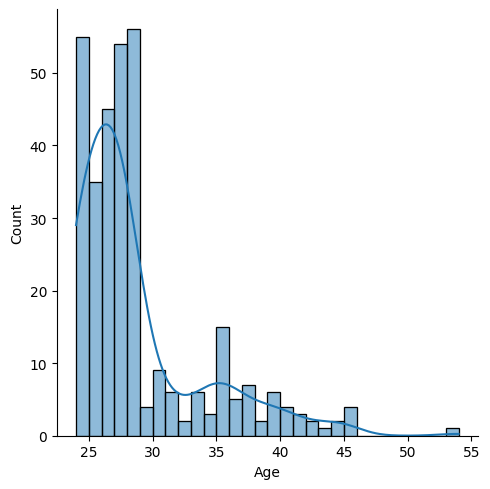

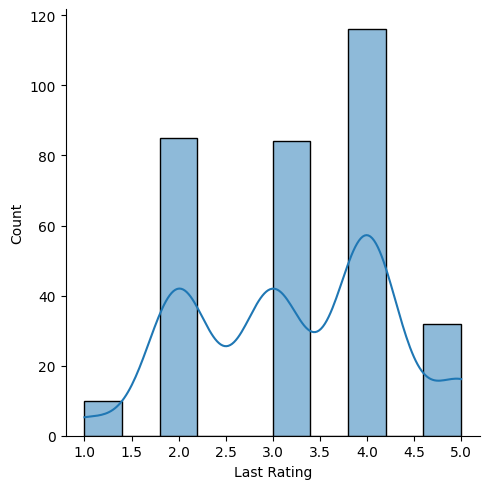

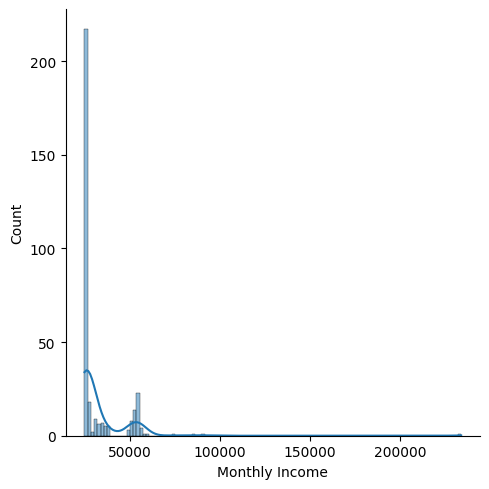

In [54]:
for x in ['Age', 'Last Rating', 'Monthly Income']:
          sn.displot(data[x], kde=True)

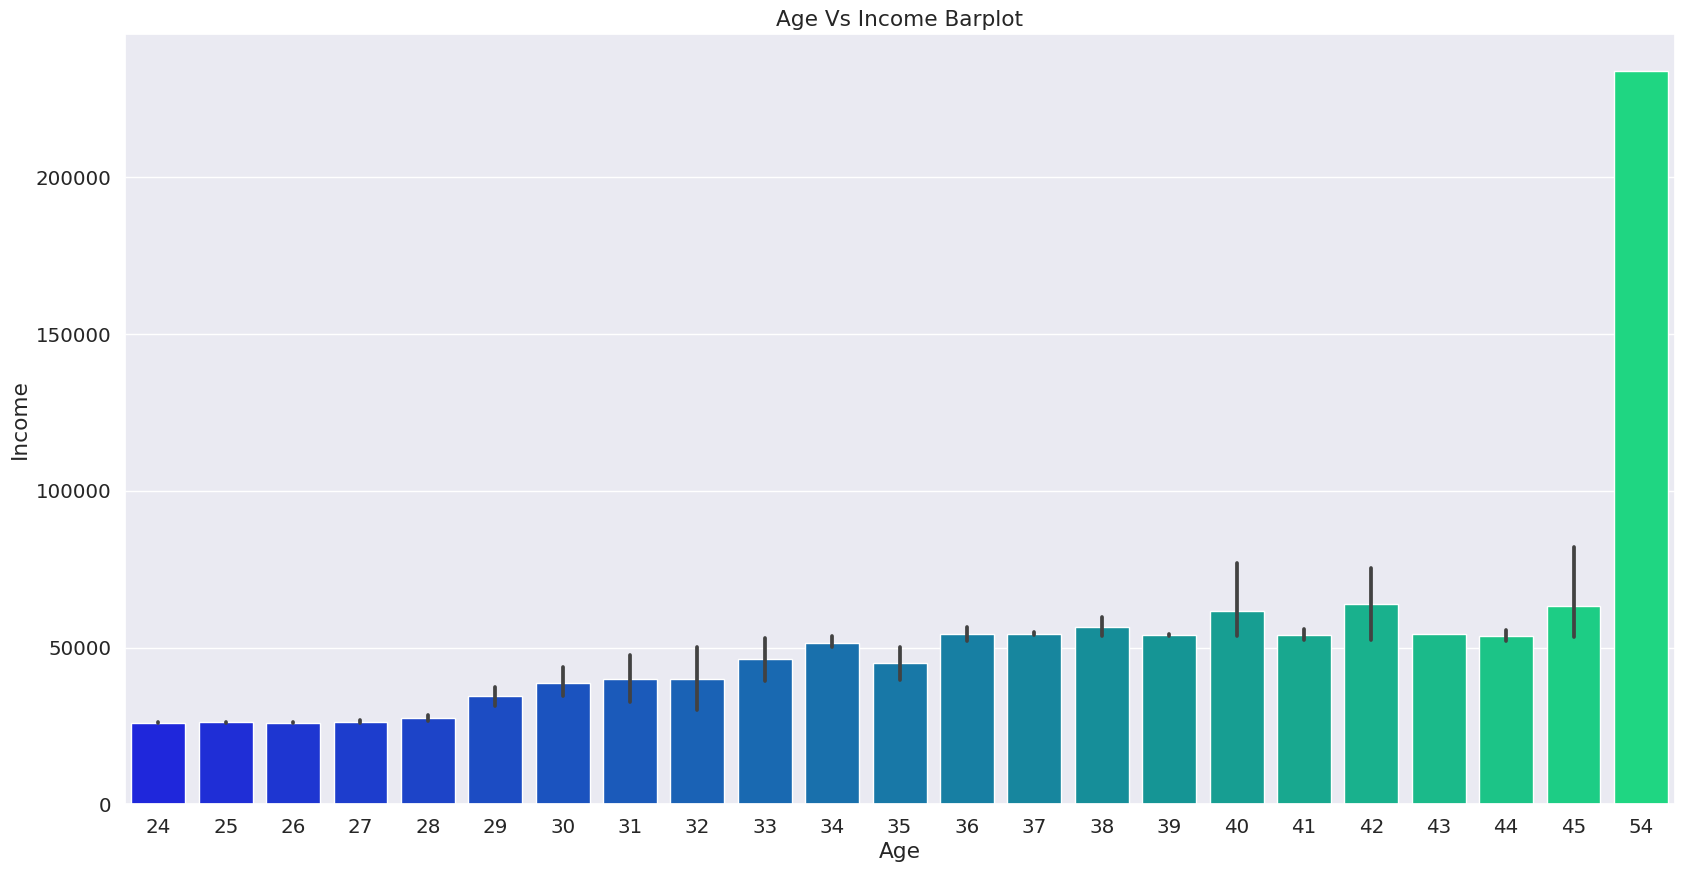

In [58]:
plt.rcParams['figure.figsize'] = [20, 10]
sn.set(style = "darkgrid", font_scale = 1.3)
month_temp = sn.barplot(x = 'Age', y = 'Monthly Income', data = data,
                         palette = 'winter');
month_temp.set(title = "Age Vs Income Barplot", xlabel = "Age", ylabel = "Income");

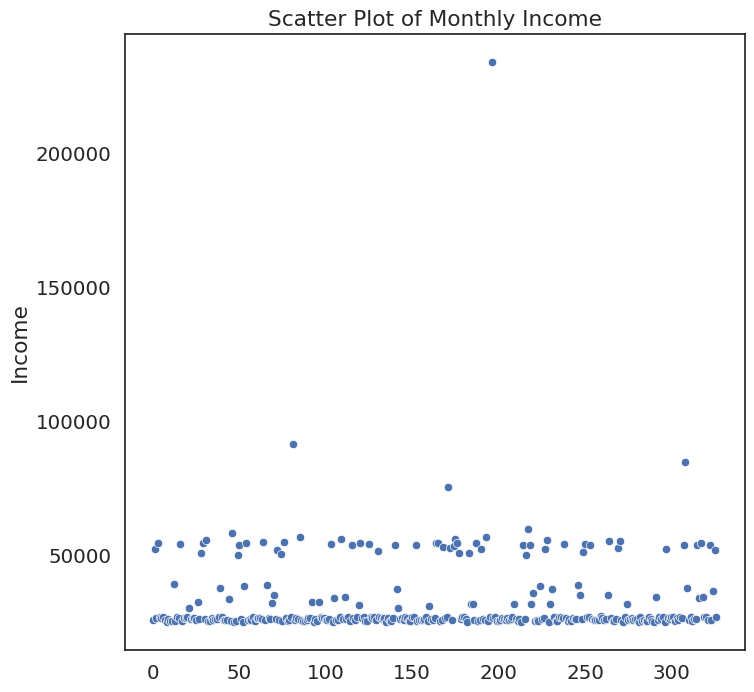

In [61]:
plt.rcParams['figure.figsize'] = [8, 8]
sn.set(style = "white", font_scale = 1.3)
scat = sn.scatterplot(data['Monthly Income'])
scat.set(title = "Scatter Plot of Monthly Income", ylabel = "Income");